In [2]:
import pandas as pd
col_names=['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']

In [3]:
glass=pd.read_csv("C:\\Users\\Rebecca\\Documents\\TL Study Docs\\ML\\Dataset\\glass.csv",names=col_names,index_col='id')

In [4]:
glass.sort_values('al',inplace=True)

In [5]:
glass.head(2)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.0,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6


In [6]:
glass['glass_type'].unique()

array([1, 6, 2, 3, 7, 5], dtype=int64)

In [7]:
glass.count()

ri            214
na            214
mg            214
al            214
si            214
k             214
ca            214
ba            214
fe            214
glass_type    214
dtype: int64

In [8]:
glass['glass_type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

In [9]:
glass.dtypes

ri            float64
na            float64
mg            float64
al            float64
si            float64
k             float64
ca            float64
ba            float64
fe            float64
glass_type      int64
dtype: object

In [10]:
glass.corr()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
glass_type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

C:\Users\Rebecca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


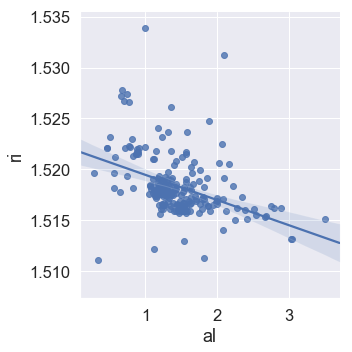

In [12]:
sns.lmplot(x='al',y='ri',data=glass)

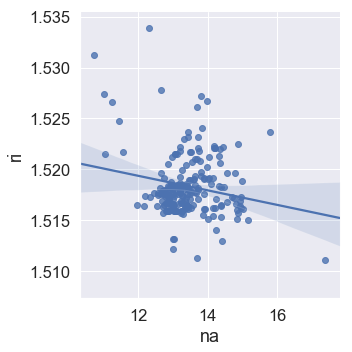

In [13]:
sns.lmplot(x='na',y='ri',data=glass)

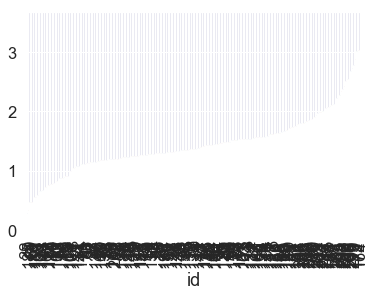

In [25]:
glass['al'].plot(kind='bar')

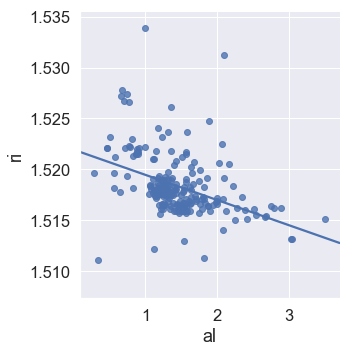

In [18]:
sns.lmplot(x='al',y='ri',data=glass,ci=None)

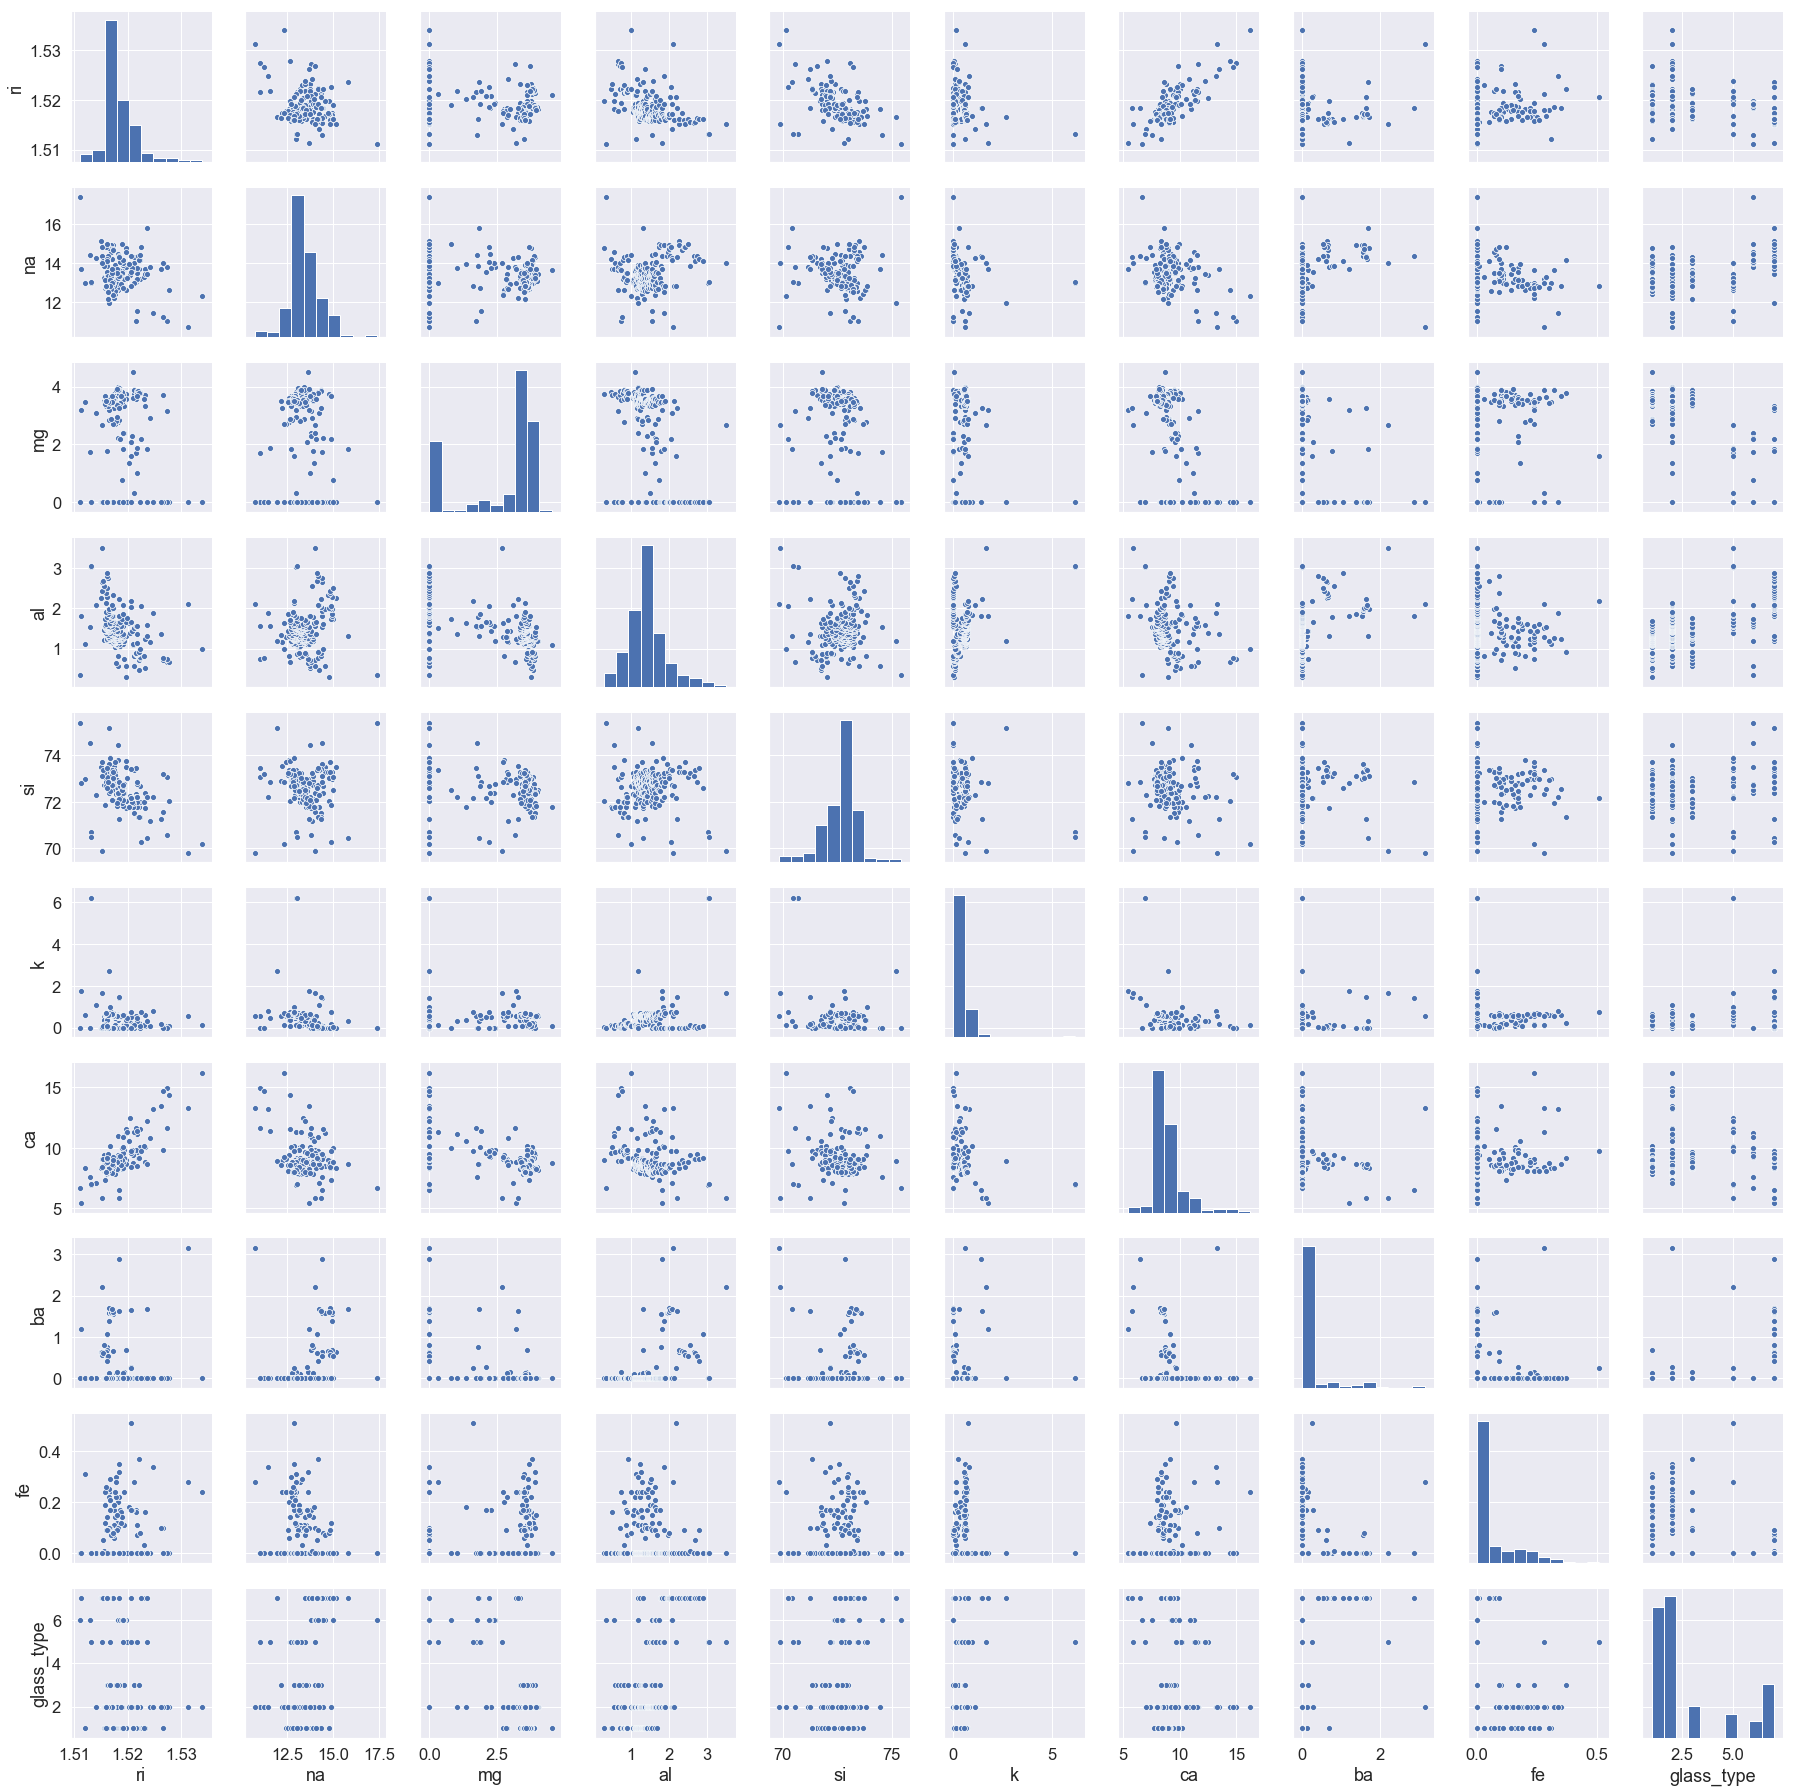

In [19]:
sns.pairplot(glass)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


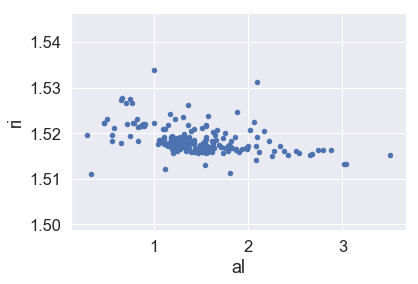

In [20]:
glass.plot(kind='scatter',x='al',y='ri')

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
feature_cols=['al']
X=glass[feature_cols]
Y=glass.ri
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
glass['riPred']=lr.predict(X)

In [24]:
glass.head(2)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,riPred
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.0,1,1.521227
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6,1.521103


Text(0, 0.5, 'Pred Ri')

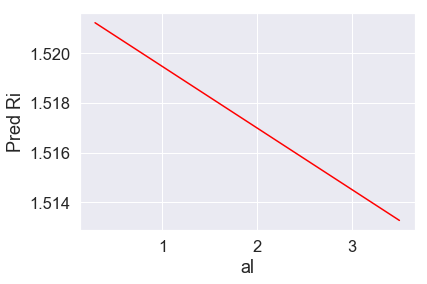

In [26]:
plt.plot(glass.al,glass.riPred,color='red')
plt.xlabel('al')
plt.ylabel('Pred Ri')

Text(0, 0.5, 'ri')

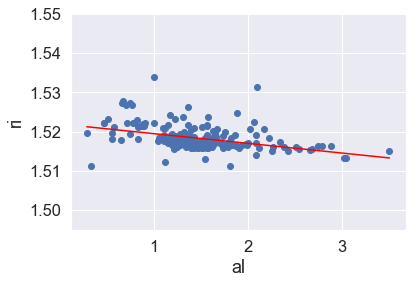

In [27]:
plt.scatter(glass.al,glass.ri)
plt.plot(glass.al,glass.riPred,color='red')
plt.xlabel('al')
plt.ylabel('ri')

In [28]:
lr.intercept_+lr.coef_*2

array([1.51699012])

In [33]:
lr.predict([[2]])

array([1.51699012])

In [34]:
list(zip(feature_cols,lr.coef_))

[('al', -0.0024776063874696235)]

In [35]:
lr.predict([[2]])-lr.coef_

array([1.51946772])

In [36]:
glass['household']=glass.glass_type.map({1:0,2:0,3:0,5:1,6:1,7:1})
glass.head(2)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,riPred,household
id,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.0,1,1.521227,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6,1.521103,1


Text(0, 0.5, 'household')

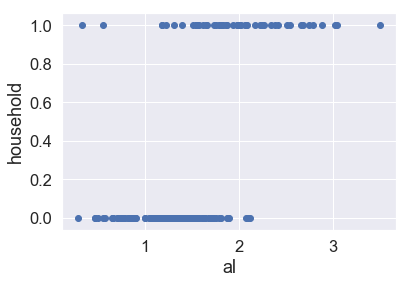

In [37]:
plt.scatter(glass.al,glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
feature_cols=['al']
X=glass[feature_cols]
Y=glass.household
lr.fit(X,Y)
glass['householdPred']=lr.predict(X)

Text(0, 0.5, 'householdPred')

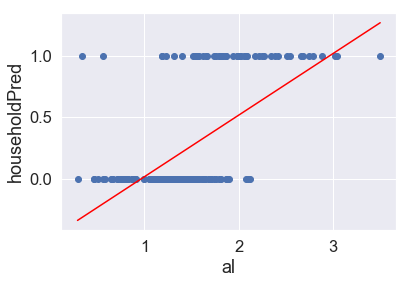

In [51]:
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.householdPred,color='red')
plt.xlabel('al')
plt.ylabel('householdPred')

In [48]:
import numpy as np
nums=np.array([5,15,8])
np.where(nums>10,'big','small')

array(['small', 'big', 'small'], dtype='<U5')

In [49]:
glass['householdPredClass']=np.where(glass.householdPred>=0.5,1,0)
glass.head(2)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,riPred,household,householdPred,householdPredClass
id,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.0,1,1.521227,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6,1.521103,1,-0.315436,0


Text(0, 0.5, 'householdPredClass')

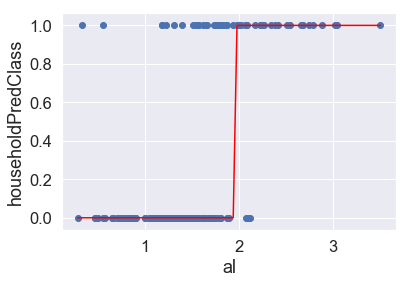

In [52]:
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.householdPredClass,color='red')
plt.xlabel('al')
plt.ylabel('householdPredClass')

In [56]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
featureCols=['al']
X=glass[feature_cols]
Y=glass.household
logReg.fit(X,Y)
glass['HouseHoldPredClass']=logReg.predict(X)

C:\Users\Rebecca\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
glass['houseHoldpredProb']=logReg.predict_proba(X)[:,1]

#[:,1] all rows first col

Text(0, 0.5, 'houseHoldPredProc')

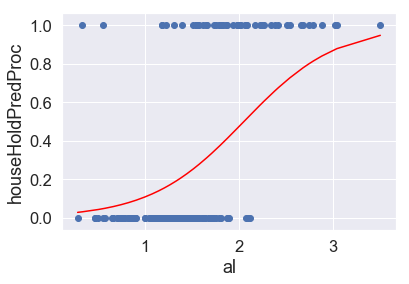

In [58]:
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.houseHoldpredProb,color='red')
plt.xlabel('al')
plt.ylabel('houseHoldPredProc')